라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

데이터셋로드

In [3]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


학습과 에측에 사용할 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
X = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 
       'BMI', 'DiabetesPedigreeFunction', 'Age',  'Pregnancies_high', 'Insulin_nan', 
       'low_glu_insulin']]
X.shape

(768, 9)

In [7]:
y = df['Outcome']
y.shape

(768,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [29]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [30]:
X_test.shape, y_test.shape

((154, 9), (154,))

In [31]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
"max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   11.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [32]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [33]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [34]:
clf.best_score_

0.8664934026389444

In [35]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.011396,0.002331,0.006201,0.000979,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.011797,0.002398,0.007400,0.000798,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.011396,0.002059,0.005598,0.001200,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.012397,0.003008,0.004198,0.000397,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.868852,0.858323,0.028361,4
27,0.011797,0.003059,0.006198,0.000748,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [36]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [37]:
clf.score(X_test, y_test)

0.8701298701298701

In [38]:
max_depth = np.random.randint(3, 20, 10)
max_depth
 
max_features = np.random.uniform(0.7, 1.0, 100)
 
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))
           }
param_distributions

{'max_depth': array([17,  5, 17, 14, 18, 12, 18,  6, 18,  3]),
 'max_features': array([0.78390237, 0.81868549, 0.76422029, 0.95194524, 0.8406091 ,
        0.94693956, 0.95972473, 0.99691139, 0.93753334, 0.77581171,
        0.9431354 , 0.97571938, 0.91582259, 0.91172456, 0.8026013 ,
        0.73731704, 0.81560258, 0.94008366, 0.7494932 , 0.86217004,
        0.92138682, 0.73138052, 0.71405511, 0.70120927, 0.7388986 ,
        0.94090057, 0.92050496, 0.73996875, 0.94111128, 0.9054681 ,
        0.98151151, 0.95494765, 0.94090886, 0.97660212, 0.84255955,
        0.78473712, 0.73799463, 0.90231181, 0.97387865, 0.79563769,
        0.70397312, 0.90930531, 0.71522276, 0.97041034, 0.74199144,
        0.81754307, 0.87805718, 0.76563872, 0.78413165, 0.7691051 ,
        0.73475527, 0.92032129, 0.89740747, 0.84475504, 0.72385879,
        0.9782069 , 0.76422789, 0.83411585, 0.92100961, 0.8486737 ,
        0.73254582, 0.83951082, 0.82595154, 0.98827511, 0.76890281,
        0.7070008 , 0.73388524, 0.905

In [39]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([17,  5, 17, 14, 18, 12, 18,  6, 18,  3]),
                                        'max_features': array([0.78390237, 0.81868549, 0.76422029, 0.95194524, 0.8406091 ,
       0.94693956, 0.95972473, 0.99691139, 0.93753334, 0.77581171,
       0.9431354 , 0.97571938, 0.91582259, 0.91172456, 0.8026013 ,
       0...
       0.98943496, 0.85312798, 0.72472844, 0.79852886, 0.82004365,
       0.88156337, 0.74946431, 0.78390644, 0.96603716, 0.94588434,
       0.78353686, 0.70688854, 0.81611789, 0.73066216, 0.89002654,
       0.70448213, 0.71828845, 0.93532508, 0.96892088, 0.82580518,
       0.9602622 , 0.93534189, 0.8735716 , 0.98517812, 0.94345212,
       0.78409222, 0.71550872, 0.84150406, 0.71876845, 0.70913811]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_s

In [40]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7373170445885797, 'max_depth': 5}

In [41]:
clf.best_score_

0.8697454351592697

In [42]:
clf.score(X_test, y_test)

0.8701298701298701

In [43]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
866,0.012197,0.004831,0.010196,0.008469,4,0.732546,5,"{'min_samples_split': 4, 'max_features': 0.732...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
905,0.009596,0.001357,0.006305,0.004396,4,0.706889,5,"{'min_samples_split': 4, 'max_features': 0.706...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
826,0.013394,0.006278,0.008614,0.001034,4,0.704482,5,"{'min_samples_split': 4, 'max_features': 0.704...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
494,0.014010,0.005669,0.006400,0.002330,4,0.737317,5,"{'min_samples_split': 4, 'max_features': 0.737...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
810,0.013215,0.006448,0.007197,0.001937,4,0.764467,5,"{'min_samples_split': 4, 'max_features': 0.764...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


학습과예측하기

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [50]:
feature_names = X_train.columns.tolist()

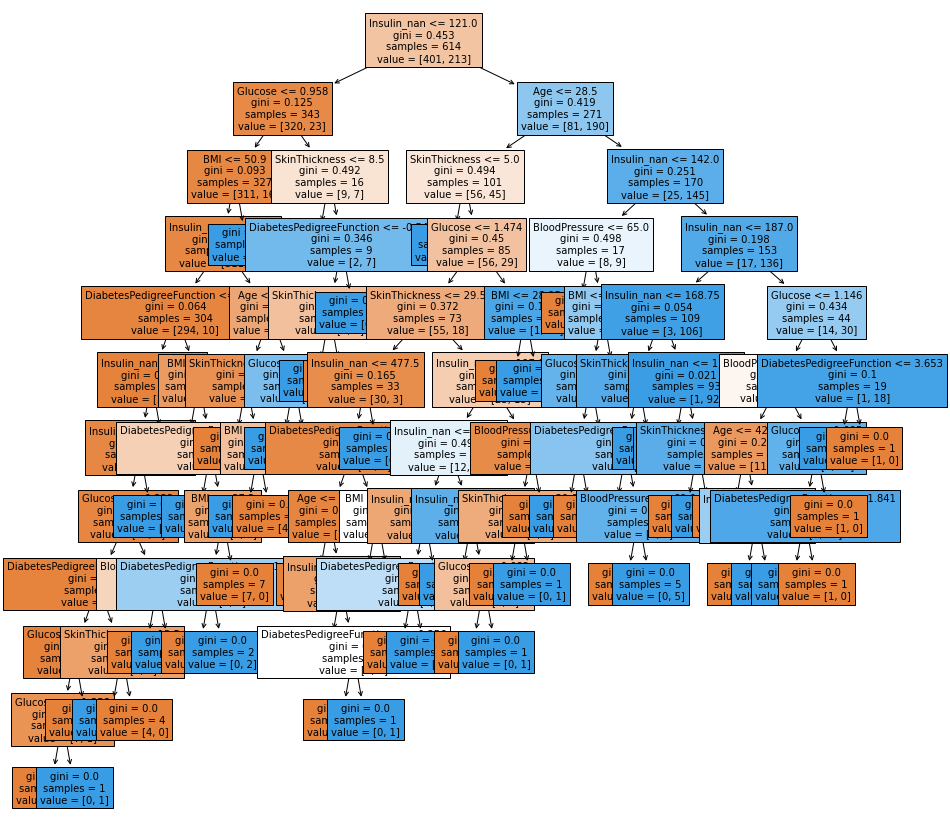

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [52]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [53]:
abs(y_predict - y_test).sum()

28

In [54]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

81.81818181818183